TI-3A

Nama anggota kelompok 3:
1. Agus Prayogi (5 | 2141720025)
2. Diah Putri Nofianti (12 | 2141720054)
3. Mohammad Alfarizi Abdullah (19 | 2141720142)
4. Muhammad Haikal Buldan (20 | 2141720080)
5. Widya Indah Puspita Sari (28 | 2141720034)

Buat program OCR untuk mengextract text dari data ktp, dengan input foto ktp dan output text

In [383]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/ML/Kuis2/Dataset KTP'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind # model untuk bahasa indonesia

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


# Diah Putri Nofianti

In [385]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from PIL import Image
import os
from tqdm import tqdm

In [386]:
# menampung array untuk gambar
plates = []

lst = os.listdir(path)
lst.sort()
for img in tqdm(lst): #kita ambil semua isi dalam folder
  try:
    img_array = cv.imread(os.path.join(path,img)) #kita baca image nya
    plates.append(img_array)
  except Exception as e:
    pass

100%|██████████| 28/28 [00:03<00:00,  7.02it/s]


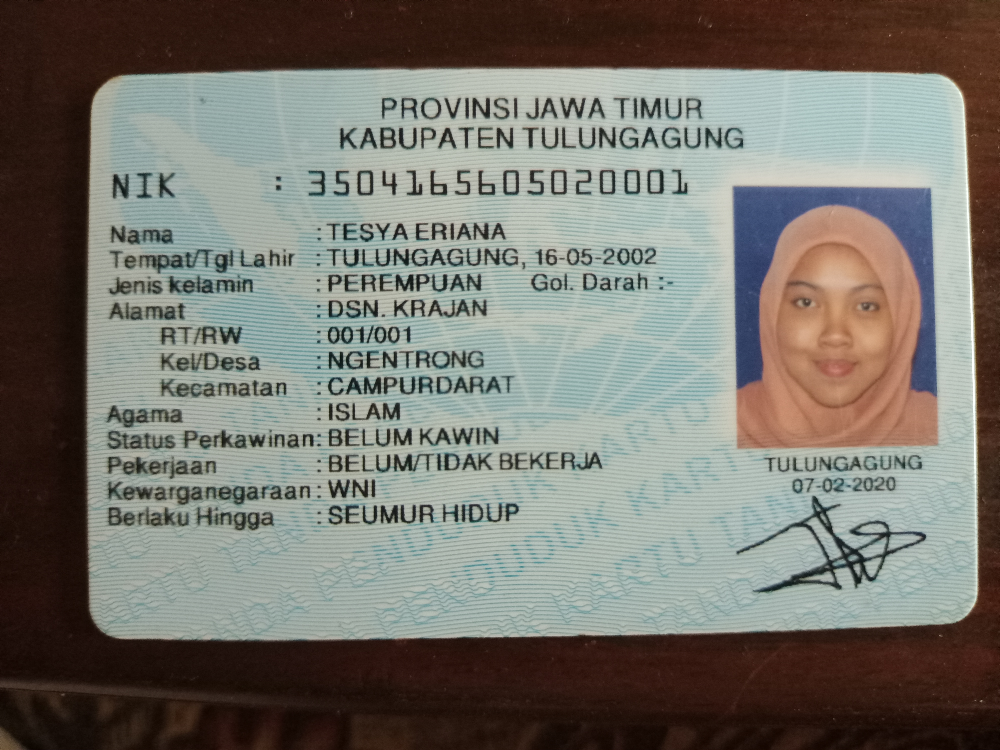

In [387]:
from random import randint

img = plates[randint(0, len(plates))]

w, h, c = img.shape
width, height = w/h*1000, 1000
ktp = cv.resize(img, (int(height), int(width)))

list_method = []
method = ['Biner','K-Mean dan Closing','Trunc','Otsu']
cv2_imshow(ktp)

# Metode pre-processing biner

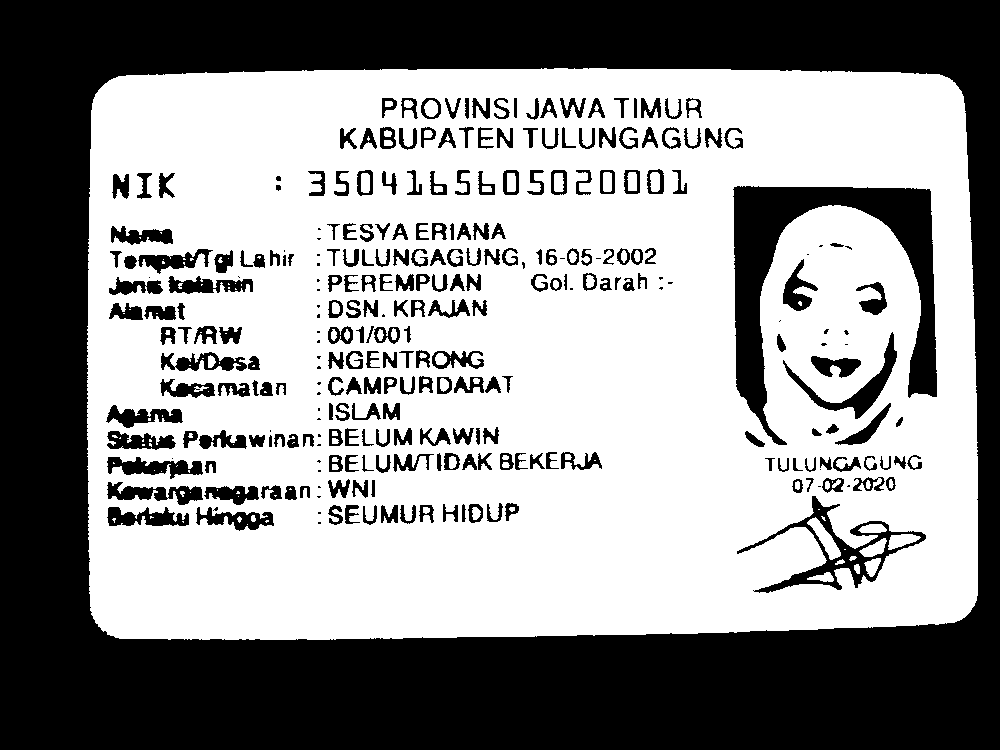

In [388]:
kernel_size = (5, 5)
sigma = 0

# Menerapkan Gaussian blurring
blurred_img = cv.bilateralFilter(ktp, 9, 85, 85)

# Convert the image to grayscale
gray_image = cv.cvtColor(blurred_img, cv.COLOR_BGR2GRAY)

# Threshold the image to find black and white regions
_, black_and_white_mask = cv.threshold(gray_image, 128, 255, cv.THRESH_BINARY)

# Find contours in the black and white mask
contours, _ = cv.findContours(black_and_white_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
result_image = ktp.copy()
cv.drawContours(result_image, contours, -1, (0, 255, 0), 2)

# print(contours)
cv2_imshow(black_and_white_mask)

In [389]:
text = pytesseract.image_to_string(gray_image, lang='ind')
print(text)
list_method.append(text)

PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

NIK : 3504165605020001

Nama : TESYA ERIANA
Tempat/Tgi Lahir : TULUNGAGUNG, 16-05-2002
Jenis keiamin : PEREMPUAN Gol. Darah :
Alamat 1: DSN. KRAJAN

RTRW :001/001

Kel/Desa : NGENTRONG

Kecamatan : CAMPURDARAT
Agama :ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : BELUM/TIDAK BEKERJA TULUNGAGUNG
Kewarganegaraan : WNI 07-02-2020
Berlaku Hingga — : SEUMUR HIDUP

 



# Metode K-Mean dan Closing

In [390]:
def segmentasi(img):
  pixel_vals = np.float32(img.reshape((-1,3)))

  # kriteria berhenti untuk k-means
  kriteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.75)

  # lakukan k-means clustering
  k = 2
  _, labels, centers = cv.kmeans(pixel_vals, k, None, kriteria, 10, cv.KMEANS_RANDOM_CENTERS)

  # konversi data ke 8-bit
  centers = np.uint8(centers)

  # hasil segmentasi
  return [centers[labels.flatten()].reshape((img.shape)), labels.reshape(img.shape[:2])]

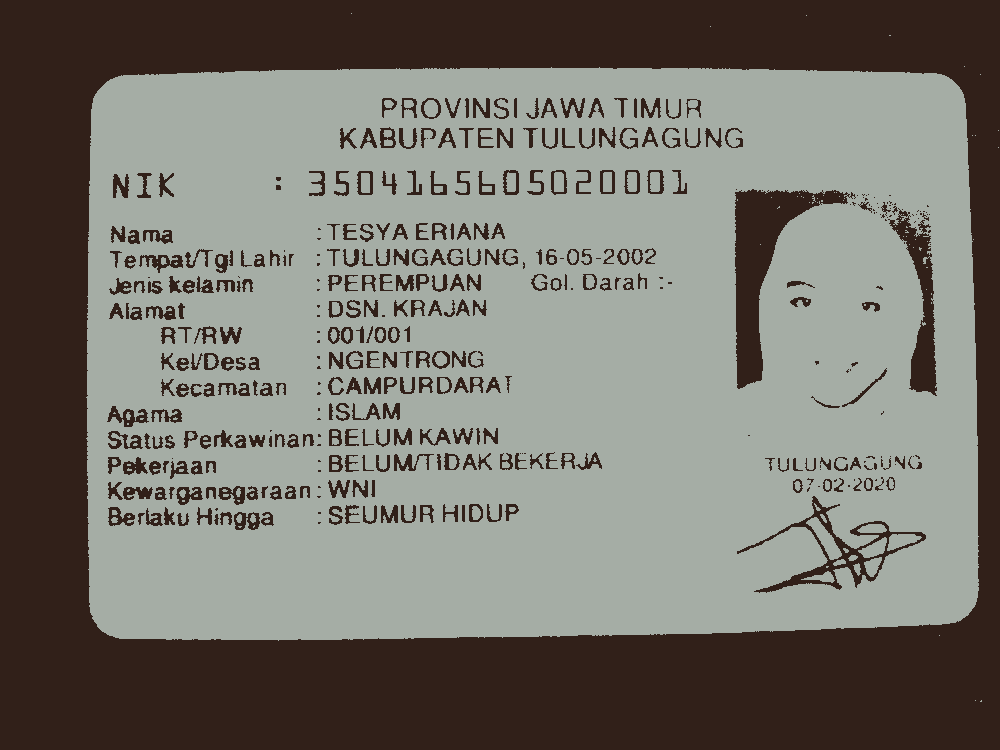

In [391]:
seg, label = segmentasi(ktp)
cv2_imshow(seg)

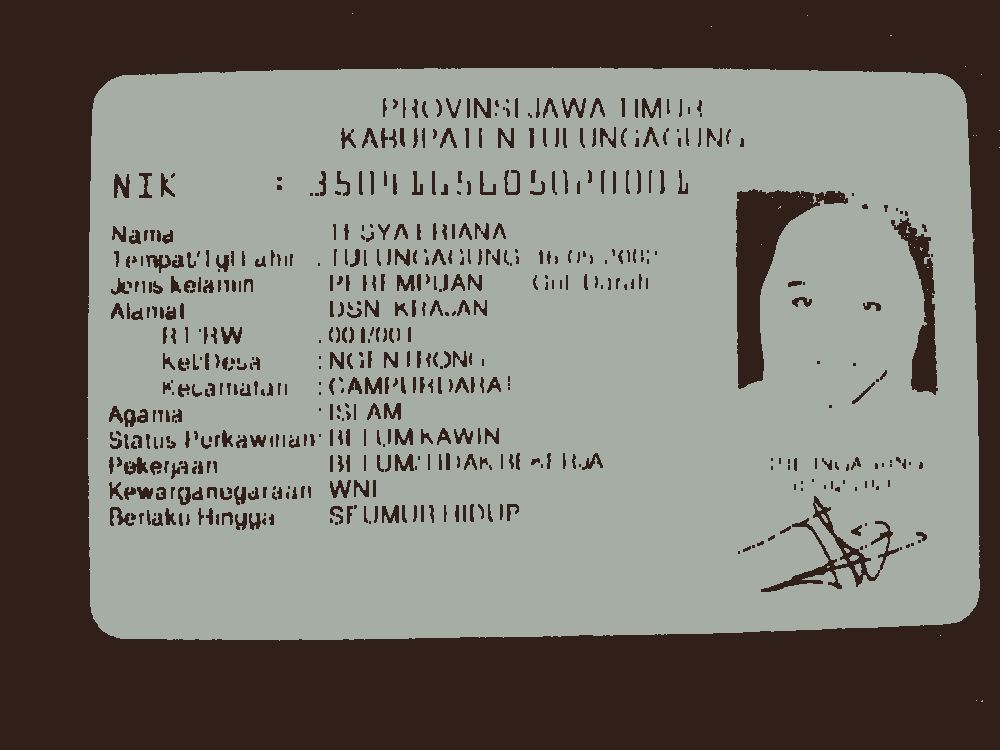

In [392]:
# kernel = np.ones((1,1,0,1),np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2,3))
closing = cv.morphologyEx(seg, cv.MORPH_CLOSE, kernel)
# kernel = cv.getStructuringElement(cv.MORPH_RECT, (2,1))
# opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)
cv2_imshow(closing)

In [393]:
text = pytesseract.image_to_string(closing, lang='ind')
print(text)
list_method.append(text)

PROVINSEIAWA LIMI 14
KABUPATEN TULUNGAGUNG

NIK 2 ISU 56050 NON

Nama TE SYAL RIANA
Tempat Iyi Lahir. TULUNGAGUNG Ai On MAA
Jenis kelanun PE RE MPLJAN Gul Garah
Alamat DSN KIRALAN

RI RW LOGO

KelDesa PENGEN RON

KeLatnatat— :GAMPUKDAKA!
Apama "ISLAM
Status Perkawinan BT LIMKAWIN
Pekerjaan IM LUME TIDAK ISP IA
Kewarganegaraan WNI
Berlaku Hingya SF UMUR HIDUP

 



# Metode Trunc

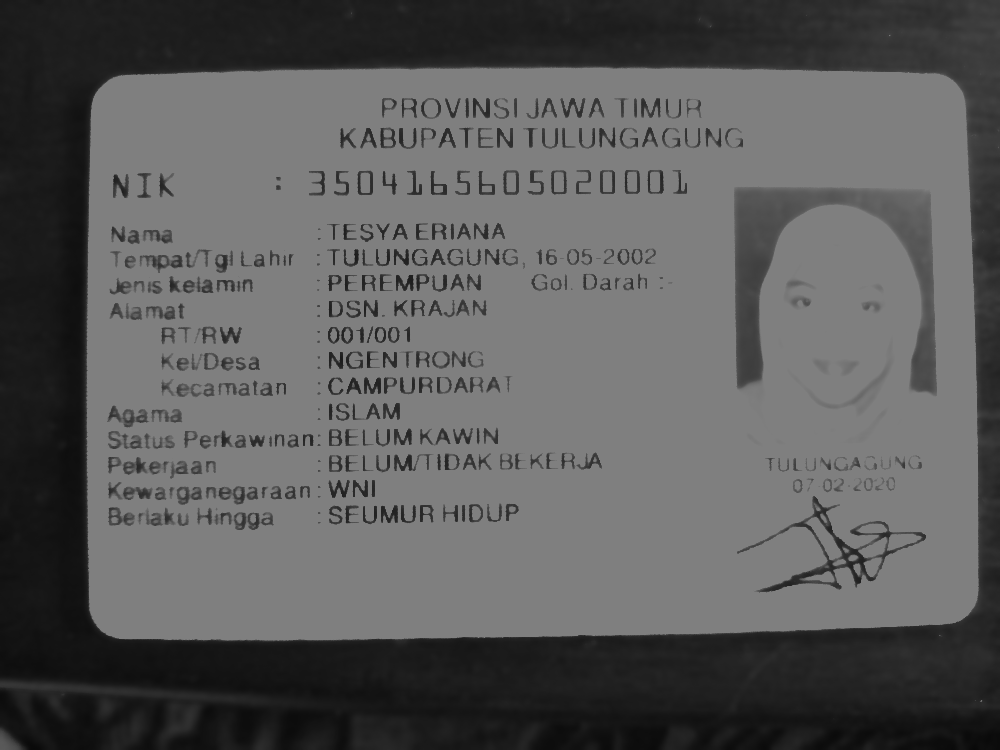

In [394]:
ret,trunc = cv.threshold(gray_image, 127,255,cv.THRESH_TRUNC)
cv2_imshow(trunc)

In [395]:
text = pytesseract.image_to_string(trunc, lang='ind')
print(text)
list_method.append(text)

PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

NIK : 3504155605020004

Nama : TESYA ERIANA
Tempat/Tgi Lahir : TULUNGAGUNG, 16-05-2002
Jenis keiamin PEREMPUAN Gol. Darah :
Alamat 1 DSN. KRAJAN

RTRW :001/001

Kel/Desa : NGEN IRONG

Kecamatan : CAMPURDARAT
Agama ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : BELUM/TIDAK BE KERJA
Kewarganegaraan: WNI
Berlaku Hingga — : SEUMUR HIDUP

 



# Metode Otsu

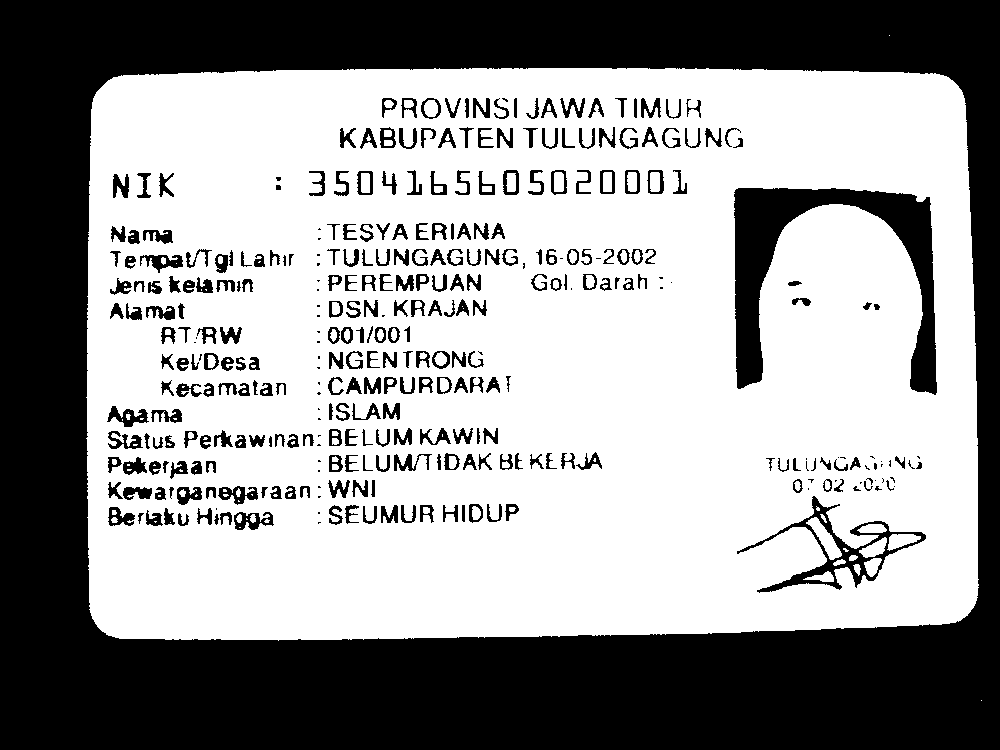

In [396]:
ret,otsu = cv.threshold(gray_image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cv2_imshow(otsu)

In [397]:
text = pytesseract.image_to_string(otsu, lang='ind')
print(text)
list_method.append(text)

PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

NIK 1 350416556095020D01

Nama : TESYA ERIANA
Tempat/TgiLahir : TULUNGAGUNG, 16-05-2002
Jenis kelamin : PEREMPUAN Gol. Darah :
Alamat 1 DSN. KRAJAN

RTRW 1001/0601

KelDesa : NGENTRONG

Kecamatan : CAMPURDARAT
Agama :#SLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : BELUM/TIDAK Bk KERJA TULUNGA SIH NG
Kewarganegaraan: WNI 07 02 soo
Beriaku Hingga ”— : SEUMUR HIDUP

 



In [398]:
import re

def filter_alphanumeric(input_string):
    # Pola regex untuk menyaring hanya huruf dan angka
    pattern = re.compile("[^a-zA-Z0-9]")

    # Menggunakan re.sub untuk mengganti karakter yang tidak sesuai dengan pola dengan string kosong
    result_string = re.sub(pattern, "", input_string)

    return result_string

# Contoh penggunaan
list_filtered = []
list_nums = []
for t in list_method:
    text = filter_alphanumeric(t)
    list_filtered.append(text)
    list_nums.append(len(text))

In [399]:
i, best, idx = 0, 0, 0
for m in list_nums:
    print(f"{i+1}. {method[i]} => {m} karakter")
    if m > best:
      best = m
      idx = i
    i += 1

print(f"\nMetode yang paling tepat untuk Foto KTP ini adalah {method[idx]} => {best} karakter\n\n\nHasil\n\n")
print(list_method[idx])

1. Biner => 318 karakter
2. K-Mean dan Closing => 293 karakter
3. Trunc => 299 karakter
4. Otsu => 322 karakter

Metode yang paling tepat untuk Foto KTP ini adalah Otsu => 322 karakter


Hasil


PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

NIK 1 350416556095020D01

Nama : TESYA ERIANA
Tempat/TgiLahir : TULUNGAGUNG, 16-05-2002
Jenis kelamin : PEREMPUAN Gol. Darah :
Alamat 1 DSN. KRAJAN

RTRW 1001/0601

KelDesa : NGENTRONG

Kecamatan : CAMPURDARAT
Agama :#SLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : BELUM/TIDAK Bk KERJA TULUNGA SIH NG
Kewarganegaraan: WNI 07 02 soo
Beriaku Hingga ”— : SEUMUR HIDUP

 

